Analyses properties of decorrelation and whitening methods for decorrelated networks

In [1]:
import numpy as np
import torch
import torch.nn as nn
from decorrelation.decorrelation import Decorrelation, DecorLinear, DecorConv2d
import matplotlib.pyplot as plt
import matplotlib
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
from decorrelation.utils import decor_train
import argparse
from decorrelation.plotting import *

# automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Grayscale(1),
        transforms.Normalize((0.5), (0.5)),
        # torch.flatten # not necessary but useful for debugging
        ])

train_data = MNIST(root='~/Data', train=True, download=True, transform=transform)
train_data = Subset(train_data, np.random.permutation(len(train_data.data))[:1000])
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

In [3]:
args = argparse.Namespace(lr=0.0, kappa=1e-2, decor_lr=1e-2, epochs=20)

model = Decorrelation(784, bias_lr=0.0, kappa=args.kappa).to(device)

lossfun = lambda x, y: nn.Parameter(torch.zeros(1, device=device, dtype=float), requires_grad=True)

res = decor_train(args, model, lossfun, train_loader, device)

AttributeError: 'Decorrelation' object has no attribute 'decor_parameters'

layer 1:

mean covariance before decorrelation: 0.56
mean variance before decorrelation: 0.93

mean covariance after decorrelation: 0.12
mean variance after decorrelation: 0.40



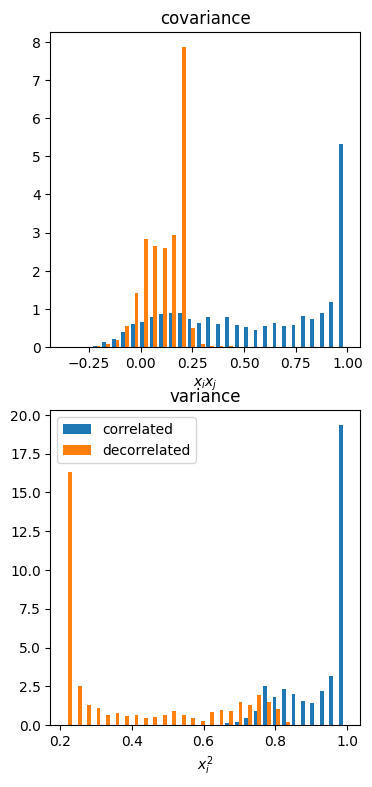

In [ ]:
init_model = Decorrelation(784, bias_lr=0.0, kappa=args.kappa).to(device)
plot_correlations(init_model, model, train_loader, device)

In [ ]:
args = argparse.Namespace(lr=1e-4, kappa=1e-2, decor_lr=1e-2, epochs=10)

class Model(nn.Sequential):
    def __init__(self, in_features, args):
        super().__init__(DecorLinear(in_features, 100, kappa=args.kappa))

    def forward(self, x):
        return super().forward(x.view(len(x), -1))
    
model = Model(784, args).to(device)

lossfun = torch.nn.CrossEntropyLoss().to(device)

res = decor_train(args, model, lossfun, train_loader, device)

epoch 0  	time:0.000 s	bp loss: 5.001185	decorrelation loss: 6.596416
epoch 1  	time:0.684 s	bp loss: 4.319663	decorrelation loss: 5.580699
epoch 2  	time:0.566 s	bp loss: 3.309361	decorrelation loss: 4.028673
epoch 3  	time:0.550 s	bp loss: 2.791930	decorrelation loss: 3.069952
epoch 4  	time:0.562 s	bp loss: 2.517590	decorrelation loss: 2.420367
epoch 5  	time:0.549 s	bp loss: 2.341769	decorrelation loss: 1.961210
epoch 6  	time:0.556 s	bp loss: 2.215903	decorrelation loss: 1.634417
epoch 7  	time:0.565 s	bp loss: 2.102100	decorrelation loss: 1.388119
epoch 8  	time:0.565 s	bp loss: 2.001168	decorrelation loss: 1.196066
epoch 9  	time:0.560 s	bp loss: 1.915947	decorrelation loss: 1.050012
epoch 10 	time:0.580 s	bp loss: 1.831913	decorrelation loss: 0.927961


layer 1:

mean covariance before decorrelation: 0.56
mean variance before decorrelation: 0.93

mean covariance after decorrelation: 0.20
mean variance after decorrelation: 0.49



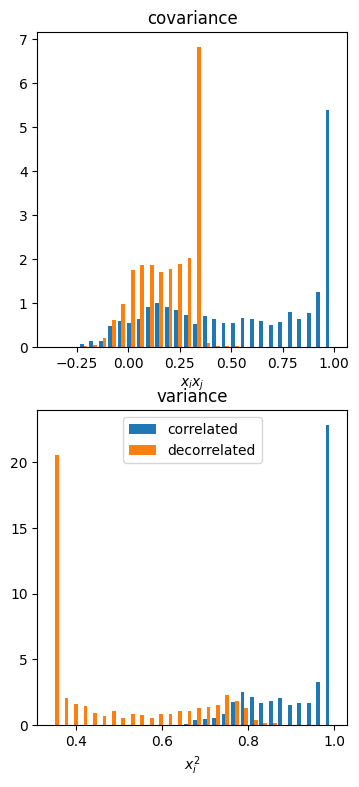

In [ ]:
init_model = Model(784, args).to(device)
plot_correlations(init_model, model, train_loader, device)

In [ ]:
args = argparse.Namespace(lr=1e-3, kappa=1e-2, decor_lr=1e-2, epochs=30)

class Model(nn.Sequential):
    def __init__(self, in_features, args):
        super().__init__(DecorLinear(in_features, 100, decor_bias=False, kappa=args.kappa),
                        nn.LeakyReLU(),
                        DecorLinear(100, 10, decor_bias=False, kappa=args.kappa)
                        )

    def forward(self, x):
        return super().forward(x.view(len(x), -1))

# class Model(nn.Sequential):
#     def __init__(self, in_features, eta, whiten):
#         super().__init__(Decorrelation(in_features, bias=False, eta=eta, whiten=whiten),
#                         nn.BatchNorm1d(in_features),
#                         nn.Linear(in_features, 100),
#                         nn.LeakyReLU(),
#                         Decorrelation(100, bias=False, eta=eta, whiten=whiten),
#                         nn.BatchNorm1d(100),
#                         nn.Linear(100, 10)
#                         )
    
model = Model(784, args).to(device)

lossfun = torch.nn.CrossEntropyLoss().to(device)

res = decor_train(args, model, lossfun, train_loader, device)

epoch 0  	time:0.000 s	bp loss: 2.534098	decorrelation loss: 6.961318
epoch 1  	time:0.566 s	bp loss: 2.063493	decorrelation loss: 12.646032
epoch 2  	time:0.563 s	bp loss: 1.290843	decorrelation loss: 30.094917
epoch 3  	time:0.596 s	bp loss: 0.896223	decorrelation loss: 32.587246
epoch 4  	time:0.586 s	bp loss: 0.673252	decorrelation loss: 28.300072
epoch 5  	time:0.577 s	bp loss: 0.556227	decorrelation loss: 20.035877
epoch 6  	time:0.556 s	bp loss: 0.462848	decorrelation loss: 14.328373
epoch 7  	time:0.553 s	bp loss: 0.415222	decorrelation loss: 11.459284
epoch 8  	time:0.554 s	bp loss: 0.394107	decorrelation loss: 9.698044
epoch 9  	time:0.553 s	bp loss: 0.345695	decorrelation loss: 8.398031
epoch 10 	time:0.571 s	bp loss: 0.302947	decorrelation loss: 7.885342
epoch 11 	time:0.566 s	bp loss: 0.283121	decorrelation loss: 7.436244
epoch 12 	time:0.579 s	bp loss: 0.262157	decorrelation loss: 6.719019
epoch 13 	time:0.583 s	bp loss: 0.239791	decorrelation loss: 5.907536
epoch 14 	tim

layer 1:

mean covariance before decorrelation: 0.56
mean variance before decorrelation: 0.93

mean covariance after decorrelation: 0.09
mean variance after decorrelation: 0.36

layer 2:

mean covariance before decorrelation: 0.05
mean variance before decorrelation: 0.15

mean covariance after decorrelation: 0.12
mean variance after decorrelation: 1.54



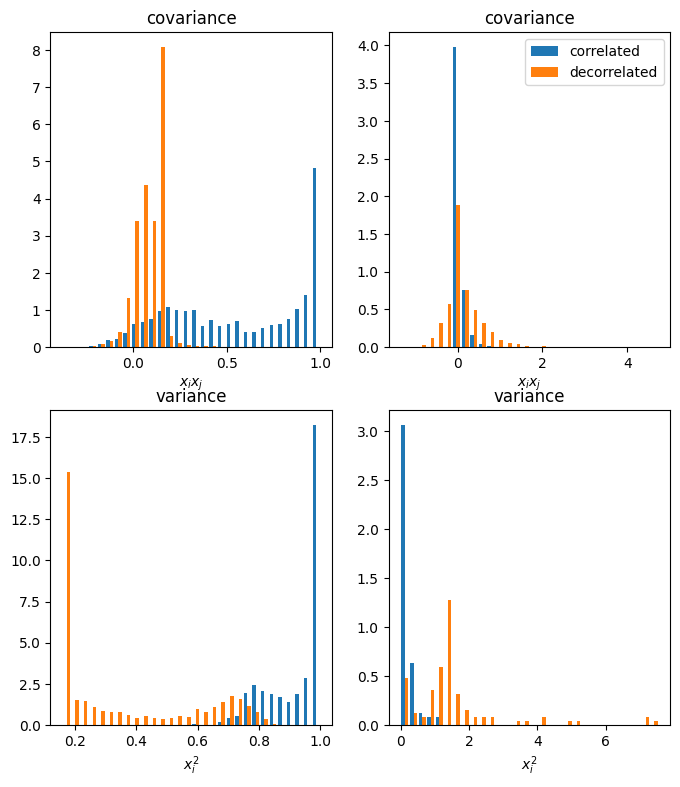

In [ ]:
init_model = Model(784, args).to(device)
plot_correlations(init_model, model, train_loader, device)